In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from math import radians, sin, cos, sqrt, atan2
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import xgboost as xgb
import pickle
import json
import warnings
warnings.filterwarnings("ignore")





In [3]:
df=pd.read_csv("C:\\Users\\KIIT\\Downloads\\kaggle\\train.csv")
df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [80]:
df.describe()



,Delivery_person_Age,Restaurant_latitude,Restaurant_longitude,delivery_latitude,delivery_longitude,Vehicle_condition,multiple_deliveries
count,43739.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,44600.000000
mean,29.567137,17.017729,70.231332,17.465186,70.845702,1.023359,0.744664
std,5.815155,8.185109,22.883647,7.335122,21.118812,0.839065,0.572473
min,15.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000
25%,25.000000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000
50%,30.000000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000
75%,35.000000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000
max,50.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000


In [4]:
df.isna().sum()


ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [5]:
df.rename(columns={'Time_taken(min)':'time_taken','Delivery_location_longitude':'delivery_longitude','Delivery_location_latitude':'delivery_latitude'},inplace=True )


In [6]:
# extract relevant  values from columns 
def  extract_column_value(df):
    df['time_taken']=df.time_taken.apply(lambda x: x.split(" ")[1])
    df['Weatherconditions']=df['Weatherconditions'].apply(lambda x: x.split(" ")[1])
    df['city_code']=df['Delivery_person_ID'].apply(lambda x:x.split('RES')[0])


extract_column_value(df)

    

                                                                       

In [7]:
#observing duplicated values
df.duplicated().sum()


0

In [8]:
def check(x):
    try:
        x=float(x)
    except Exception as e:
        x=np.nan
    return x
def check_str(x):
    if x=='\"nan\"':
        x=np.nan
    return x
print(check_str('\"nan\"'))


nan


# Data Analysis



# checking for nan in rowdata

In [9]:
df.Delivery_person_Age=df['Delivery_person_Age'].apply(check)
df.Delivery_person_Ratings=df['Delivery_person_Ratings'].apply(check)
df.multiple_deliveries=df['multiple_deliveries'].apply(check)





In [10]:
pattern = re.compile(r'^\s*\"?nan\"?\s*$')

# Convert any variation of "nan" to actual NaN values
df = df.applymap(lambda x: np.nan if pattern.match(str(x)) else x)


In [11]:
df.isnull().sum()


ID                            0
Delivery_person_ID            0
Delivery_person_Age        1854
Delivery_person_Ratings    1908
Restaurant_latitude           0
Restaurant_longitude          0
delivery_latitude             0
delivery_longitude            0
Order_Date                    0
Time_Orderd                1731
Time_Order_picked             0
Weatherconditions           616
Road_traffic_density        601
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         993
Festival                    228
City                       1200
time_taken                    0
city_code                     0
dtype: int64

In [12]:
#nan present in this columns 
# check_str not working 
df.City=df['City'].apply(check_str)
df.Time_Orderd=df['Time_Orderd'].apply(check_str)
df.Road_traffic_density=df['Road_traffic_density'].apply(check_str)
df.Festival=df['Festival'].apply(check_str)
df.Weatherconditions=df['Weatherconditions'].apply(check_str)
df.City=df['City'].apply(check_str)

# removing nan data

In [13]:
df2=df.dropna()
df2.isnull().sum()


ID                         0
Delivery_person_ID         0
Delivery_person_Age        0
Delivery_person_Ratings    0
Restaurant_latitude        0
Restaurant_longitude       0
delivery_latitude          0
delivery_longitude         0
Order_Date                 0
Time_Orderd                0
Time_Order_picked          0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
time_taken                 0
city_code                  0
dtype: int64

In [14]:
# update for datatype
def update_datatype(df2):
    df2['Delivery_person_Age']=df2['Delivery_person_Age'].astype('float')
    df2['multiple_deliveries']=df2['multiple_deliveries'].astype('float')
    df2['Delivery_person_Ratings']=df2['Delivery_person_Ratings'].astype('float')
    df2['Order_Date']=pd.to_datetime(df2['Order_Date'],format="%d-%m-%Y") 

update_datatype(df2)



                            

In [19]:
df2.dtypes


ID                                 object
Delivery_person_ID                 object
Delivery_person_Age               float64
Delivery_person_Ratings           float64
Restaurant_latitude               float64
Restaurant_longitude              float64
delivery_latitude                 float64
delivery_longitude                float64
Order_Date                 datetime64[ns]
Time_Orderd                        object
Time_Order_picked                  object
Weatherconditions                  object
Road_traffic_density               object
Vehicle_condition                   int64
Type_of_order                      object
Type_of_vehicle                    object
multiple_deliveries               float64
Festival                           object
City                               object
time_taken                         object
city_code                          object
dtype: object

In [15]:
# for pie
def pie_chart(df2,name):
    data=df2[name].value_counts()
    plt.title(name)
    plt.pie(x=data.values,labels=data.index,autopct='%1.1f%%')



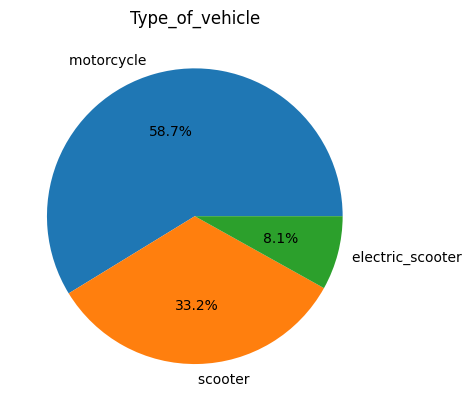

In [21]:
pie_chart(df2,'Type_of_vehicle')



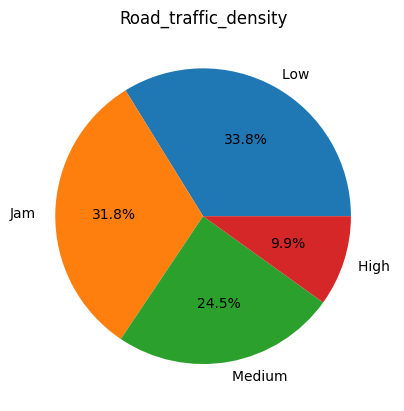

In [22]:
# traffic condition 
pie_chart(df2,'Road_traffic_density')


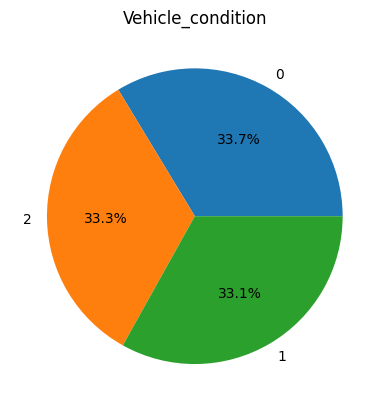

In [23]:
pie_chart(df2,'Vehicle_condition')


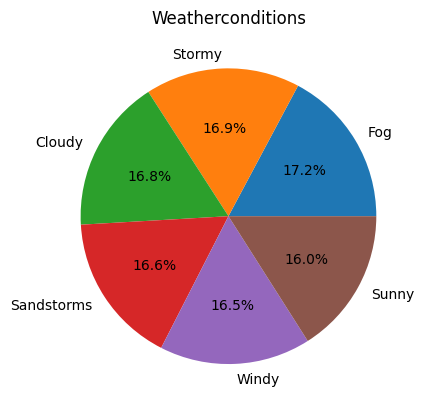

In [24]:
# weather conditions
pie_chart(df2,'Weatherconditions')


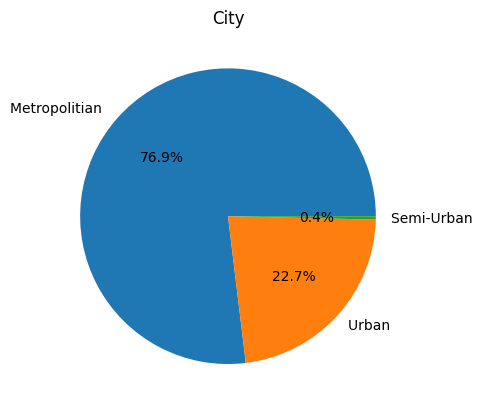

In [25]:
# city
pie_chart(df2,'City')



In [16]:
df2['time_taken']=df2.time_taken.astype('float')


In [27]:
print(f'mean {np.mean(df2.time_taken)}, '
      f'minimum  {np.min(df2.time_taken)} '
      f'and maximum time taken {np.max(df2.time_taken) } minutes')


mean 26.55335041578031, minimum  10.0 and maximum time taken 54.0 minutes


In [28]:
# average age of delivery person
print(f'average age of delivery person : {np.mean(df2.Delivery_person_Age)} , MIN age : {np.min(df2.Delivery_person_Age)}  and max age : {np.max(df2.Delivery_person_Age)}')



average age of delivery person : 29.610012570102494 , MIN age : 20.0  and max age : 39.0


<BarContainer object of 20 artists>

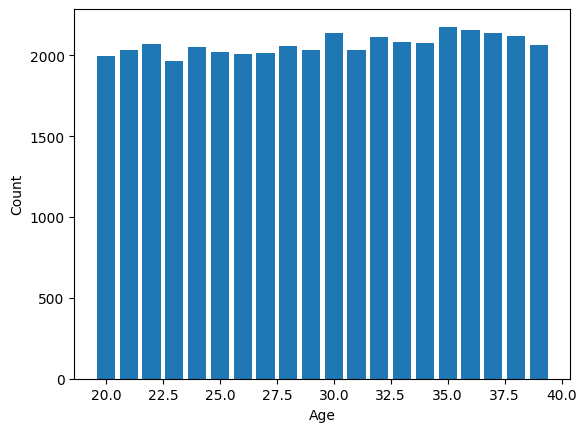

In [29]:
# see distribution
data_age=df2.Delivery_person_Age.value_counts()
plt.xlabel('Age')
plt.ylabel('Count')
plt.bar(data_age.index,data_age.values)




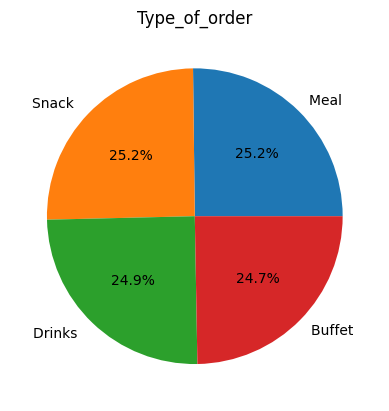

In [30]:
pie_chart(df2,'Type_of_order')


# highest rating 

In [31]:
data_age=df2.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean().nlargest(20)
data_age


Delivery_person_ID
AURGRES13DEL03     4.925000
KOCRES13DEL01      4.861538
GOARES05DEL03      4.842857
LUDHRES20DEL03     4.841667
AGRRES19DEL02      4.840000
GOARES12DEL01      4.836364
KOLRES14DEL01      4.827273
ALHRES09DEL03      4.825000
AGRRES20DEL02      4.818182
LUDHRES02DEL01     4.816667
KOLRES20DEL03      4.811111
ALHRES18DEL03      4.810000
KNPRES04DEL02      4.810000
CHENRES09DEL03     4.806452
ALHRES11DEL02      4.800000
LUDHRES16DEL03     4.800000
LUDHRES19DEL03     4.800000
ALHRES06DEL03      4.800000
AURGRES03DEL03     4.800000
GOARES13DEL03      4.800000
Name: Delivery_person_Ratings, dtype: float64

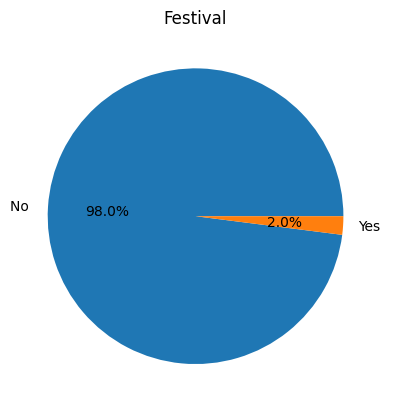

In [32]:
# festival happens
pie_chart(df2,'Festival')

In [33]:
# group by and pie_chart
def group_pie(df2,name,target):
    data=df2.groupby(name)[target].mean()
    plt.figure(figsize=(14,4))
    plt.bar(data.index,data.values)
    

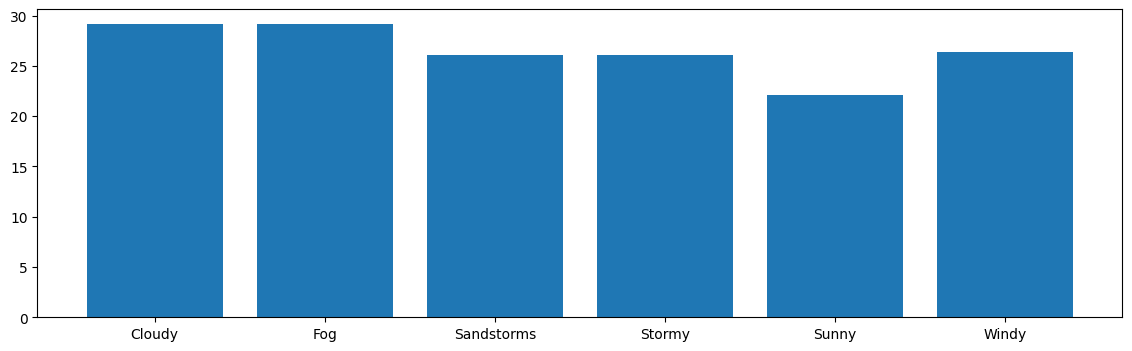

In [34]:
# seeing effect of weather conditions to delivery time
group_pie(df2,'Weatherconditions','time_taken')


# Feature Engineering 

In [17]:
def extract_features(df2):
    df2['day']=df2['Order_Date'].dt.day
    df2['month']=df2['Order_Date'].dt.month
    df2['quarter']=df2.Order_Date.dt.quarter
    df2['year']=df2.Order_Date.dt.year
    df2['day_of_week']=df2.Order_Date.dt.day_of_week.astype('int')
    df2['is_month_start']=df2.Order_Date.dt.is_month_start.astype('int')
    df2['is_month_end']=df2.Order_Date.dt.is_month_end.astype('int')
    df2['is_quater_start']=df2.Order_Date.dt.is_quarter_start.astype('int')
    df2['is_quater_end']=df2.Order_Date.dt.is_quarter_end.astype('int')
    df2['is_year_start']=df2.Order_Date.dt.is_year_start.astype('int')
    df2['is_year_end']=df2.Order_Date.dt.is_year_end.astype('int')
    df2['is_weekend']=np.where(df2['day_of_week'].isin([5,6]),1,0)
    
extract_features(df2)


    

In [18]:
# remove unwanted columns 
def remove_cols(df2):
    df2.drop(columns=['ID','Delivery_person_ID'],inplace=True,axis=0)

remove_cols(df2)

In [19]:
# calculatio of difference between ordered and time_order picked

def change_into_time(df2):
    df2['Time_Orderd']=pd.to_timedelta(df2['Time_Orderd'])
    df2['Time_Order_picked']=pd.to_timedelta(df2['Time_Order_picked'])

change_into_time(df2)
def calcualation_difference(df2):
    # if order happens  at  11 and received at 12 ; adding offset for that 
    df2['order_pick_format']=pd.to_datetime(df2['Order_Date']+np.where(df2['Time_Order_picked'] < df2['Time_Orderd'] , pd.DateOffset(days=1),pd.DateOffset(days=0))+df2['Time_Order_picked'])
    df2['order_date_format']=df2['Order_Date']+df2['Time_Orderd']
    
    df2['order_prepare_time']=(df2['order_pick_format']-df2['order_date_format']).dt.total_seconds()/60
  
calcualation_difference(df2)


In [20]:
#df2.drop(columns=['Time_Order_picked_formatted','Time_Ordered_formatted'],axis=1,inplace=True)
df2[df2.order_prepare_time <0]
# now removing   order_pick_format	order_date_format
df2.drop(columns=['order_pick_format','order_date_format','Order_Date','Time_Orderd','Time_Order_picked'],axis=1,inplace=True)





In [21]:
# calculate distance between restaurant and  customer location */

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers. Use 3956 for miles
    distance = r * c

    return distance


df2['delivery_distance']=df2.apply(lambda row  : haversine(row['Restaurant_latitude'],row['Restaurant_longitude'],row['delivery_latitude'],row['delivery_longitude']),axis=1)






# Data Preprocessing

In [22]:
df2


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,delivery_latitude,delivery_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quater_start,is_quater_end,is_year_start,is_year_end,is_weekend,order_prepare_time,delivery_distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3.025149
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20.183530
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1.552758
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7.790401
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,...,3,0,0,0,0,0,0,0,10.0,1.489846
45589,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,...,2,0,0,0,0,0,0,0,15.0,11.007735
45590,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,...,4,0,0,0,0,0,0,0,15.0,4.657195
45591,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,...,0,0,0,0,0,0,0,0,5.0,6.232393


In [106]:
# finding max,min and  avg distance 
print('Distance between restaurant and location \n')
print(f' average distance: {np.mean(df2.delivery_distance)} ,\n  minimum distance : {np.min(df2.delivery_distance)} ,  \n  maximum distance : {np.max(df2.delivery_distance)}')
# finding max,min and  avg order prepare time
print('\n ORDER PREPARE TIME \n')
print(f' average time: {np.mean(df2.order_prepare_time)} ,\n  minimum time : {np.min(df2.order_prepare_time)} ,  \n  maximum time : {np.max(df2.order_prepare_time)}')

Distance between restaurant and location 

 average distance: 26.912063268341573 ,
  minimum distance : 1.4650674052309467 ,  
  maximum distance : 6884.726398933316

 ORDER PREPARE TIME 

 average time: 9.989242893057435 ,
  minimum time : 5.0 ,  
  maximum time : 15.0


# encoding  categorical features



In [23]:
def label_encoding_features(df):
    categorical_columns=df.select_dtypes(include='object').columns
    labelencoder=LabelEncoder()
    df[categorical_columns]=df[categorical_columns].apply(lambda col : labelencoder.fit_transform(col))

label_encoding_features(df2)


In [113]:
df2.dtypes




Delivery_person_Age        float64
Delivery_person_Ratings    float64
Restaurant_latitude        float64
Restaurant_longitude       float64
delivery_latitude          float64
delivery_longitude         float64
Weatherconditions            int32
Road_traffic_density         int32
Vehicle_condition            int64
Type_of_order                int32
Type_of_vehicle              int32
multiple_deliveries        float64
Festival                     int32
City                         int32
time_taken                 float64
city_code                    int32
day                          int32
month                        int32
quarter                      int32
year                         int32
day_of_week                  int32
is_month_start               int32
is_month_end                 int32
is_quater_start              int32
is_quater_end                int32
is_year_start                int32
is_year_end                  int32
is_weekend                   int32
order_prepare_time  

# Train test split 

In [24]:
X=df2.drop('time_taken',axis=1)
y=df2.time_taken
X.shape,y.shape


((41368, 29), (41368,))

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(33094, 29) (33094,) (8274, 29) (8274,)


# Standardization

In [26]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)




# Model Building

In [27]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),xgb.XGBRegressor()]
param_grid=[{},{'max_depth': [3, 5, 7]},
    {'n_estimators': [20,25,30]},
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},
           ]

for i ,model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()
    

LinearRegression:
Best parameters: {}
Best R2 score: 0.5022659988564349

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.7454513383677843

RandomForestRegressor:
Best parameters: {'n_estimators': 30}
Best R2 score: 0.8273885983157957

XGBRegressor:
Best parameters: {'max_depth': 7, 'n_estimators': 20}
Best R2 score: 0.8362094710362376



# xgg regressor  has the best r2 score

In [28]:
# model building
model=xgb.XGBRegressor(n_estimators=20,max_depth=7)
model.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))


Mean Absolute Error (MAE): 3.06
Mean Squared Error (MSE): 14.48
Root Mean Squared Error (RMSE): 3.81
R-squared (R2) Score: 0.84


In [32]:
# now save the model
with open('delivery_time_prediction.pkl','wb') as f:
    pickle.dump(model,f)
    

In [ ]:
with open('delivery_time_prediction.pkl', 'rb') as f:
    model = pickle.load(f)


In [34]:
#storing columns

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
    

In [35]:
df2.columns


Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'time_taken', 'city_code', 'day', 'month', 'quarter', 'year',
       'day_of_week', 'is_month_start', 'is_month_end', 'is_quater_start',
       'is_quater_end', 'is_year_start', 'is_year_end', 'is_weekend',
       'order_prepare_time', 'delivery_distance'],
      dtype='object')

In [41]:
#
model.predict(22,2)


array([40.45385], dtype=float32)